In [1]:
import os
import numpy as np

import shapely

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [2]:
andes = list(shpreader.Reader('..'+os.sep+'mapping'+os.sep+'andes_1000.shp').geometries())

In [3]:
product = 'kurpf'

In [4]:
data = ca.read_netcdf('/mnt/Data/Data/PF/'+product+'_SA_count/'+product+'_SA_count.nc',2)
lat = data['lat']
lon = data['lon']
tim = data['time']
pf_count_all = data['count'].data

nlat = len(lat)
nlon = len(lon)

lon2d, lat2d = np.meshgrid(lon, lat)

lat : (120,)
lon : (110,)
time : (85,)
count : (85, 120, 110)


In [5]:
PF_tmp = []

for t in range(len(tim)):

    if tim[t].month == 12 or tim[t].month == 1 or tim[t].month == 2:

        PF_tmp.append(pf_count_all[t,:,:])

PF_all = np.array(PF_tmp)
print(PF_all.shape)

(21, 120, 110)


In [6]:
# var = '40dbz_GT_10km'
# var = '20dbz_GT_10km'

# var = 'MAXHT40_GT_10km'
# var = 'MAXHT20_GT_10km'

# var = 'NPIXELS_GT_20MM'
var = 'NPIXELS_GT_30MM'

# var = 'NCONV'
# var = 'MIN85PCT_LT_225K'

In [7]:
# data = ca.read_netcdf('/mnt/Data/Data/PF/'+product+'_SA_count/'+product+'_SA_count_'+var+'.nc',2)
data = ca.read_netcdf('/mnt/Data/Data/PF/'+product+'_SA_count/'+product+'_SA_count_'+var+'.nc',2)
lat = data['lat']
lon = data['lon']
tim = data['time']
pf_count_case = data['count'].data

nlat = len(lat)
nlon = len(lon)

lon2d, lat2d = np.meshgrid(lon, lat)

lat : (120,)
lon : (110,)
time : (85,)
count : (85, 120, 110)


In [8]:
PF_tmp = []

for t in range(len(tim)):

    if tim[t].month == 12 or tim[t].month == 1 or tim[t].month == 2:

        PF_tmp.append(pf_count_case[t,:,:])

PF_case = np.array(PF_tmp)
print(PF_case.shape)

(21, 120, 110)


../images/kurpf_NPIXELS_GT_30MM_all.png


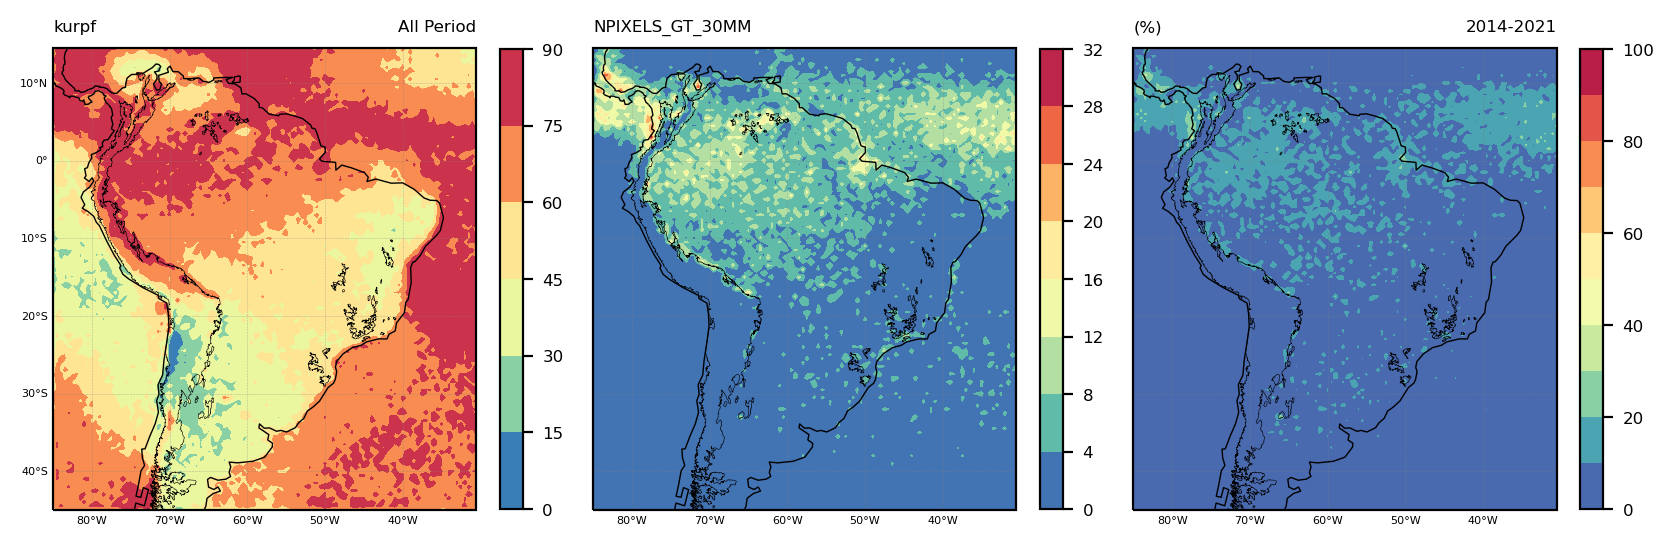

In [9]:
cmap = plt.cm.Spectral_r

# levels_ref = np.arange(0,260,10)
levels_percent = np.arange(0,110,10)
# levels_percent = None
levels_ref = None
levels = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,8),dpi=200)
gs = gridspec.GridSpec(1,3)

#=====================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, np.sum(pf_count_all,axis=0), cmap=cmap, levels=levels_ref)
cbar = plt.colorbar(a1,fraction=0.049)
cbar.ax.tick_params(labelsize=6)

ax1.set_title(product,loc='left',fontsize=6)
ax1.set_title('All Period',loc='right',fontsize=6)

#=====================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, np.sum(pf_count_case,axis=0), cmap=cmap, levels=levels_ref)
cbar = plt.colorbar(a1,fraction=0.049)
cbar.ax.tick_params(labelsize=6)

ax1.set_title(var,loc='left',fontsize=6)

#=====================================================================================================
percent_2d = (np.sum(pf_count_case,axis=0)/np.sum(pf_count_all,axis=0))*100

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, percent_2d, cmap=cmap, levels=levels_percent)
cbar = plt.colorbar(a1,fraction=0.049)
cbar.ax.tick_params(labelsize=6)

ax1.set_title('(%)',loc='left',fontsize=6)
ax1.set_title('2014-2021',loc='right',fontsize=6)

#=====================================================================================================
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.15)

salida = '../images/'+product+'_'+var+'_all.png'
print(salida)
plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)

/tmp/ipykernel_58508/2293408885.py:54: RuntimeWarning: invalid value encountered in true_divide
  percent_2d = (np.sum(PF_case,axis=0)/np.sum(PF_all,axis=0))*100


../images/kurpf_NPIXELS_GT_30MM_summer.png


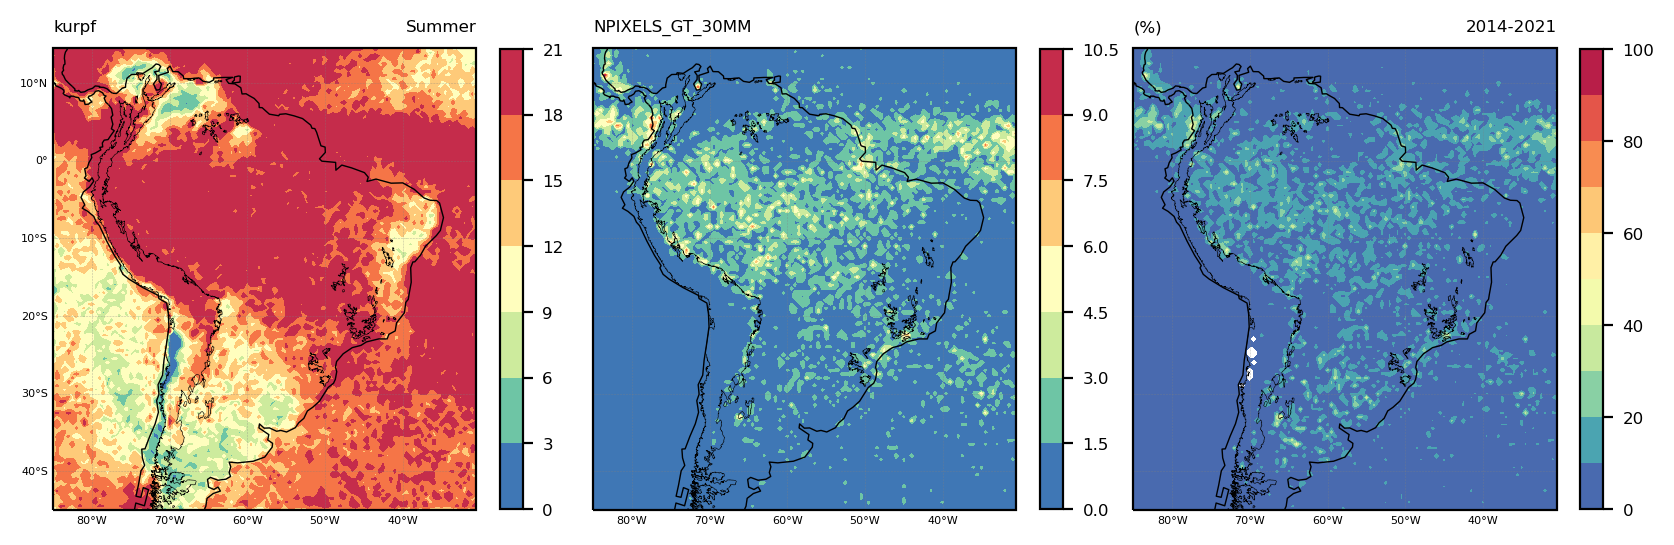

In [10]:
cmap = plt.cm.Spectral_r

# levels_ref = np.arange(0,260,10)
levels_percent = np.arange(0,110,10)
# levels_percent = None
levels_ref = None
levels = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,8),dpi=200)
gs = gridspec.GridSpec(1,3)

#=====================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, np.sum(PF_all,axis=0), cmap=cmap, levels=levels_ref)
cbar = plt.colorbar(a1,fraction=0.049)
cbar.ax.tick_params(labelsize=6)

ax1.set_title(product,loc='left',fontsize=6)
ax1.set_title('Summer',loc='right',fontsize=6)

#=====================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, np.sum(PF_case,axis=0), cmap=cmap, levels=levels_ref)
cbar = plt.colorbar(a1,fraction=0.049)
cbar.ax.tick_params(labelsize=6)

ax1.set_title(var,loc='left',fontsize=6)

#=====================================================================================================
percent_2d = (np.sum(PF_case,axis=0)/np.sum(PF_all,axis=0))*100

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, percent_2d, cmap=cmap, levels=levels_percent)
cbar = plt.colorbar(a1,fraction=0.049)
cbar.ax.tick_params(labelsize=6)

ax1.set_title('(%)',loc='left',fontsize=6)
ax1.set_title('2014-2021',loc='right',fontsize=6)

#=====================================================================================================
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.15)

salida = '../images/'+product+'_'+var+'_summer.png'
print(salida)
plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)